In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [3]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [4]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [5]:
#1.1
crosstab = pd.crosstab(df['category'], df['isBestSeller'])
crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [6]:
crosstab_sorted = crosstab.sort_values(by=True, ascending=False)
top_crosstab = crosstab_sorted.head(5)
top_crosstab

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306


In [7]:
#1.2
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)
chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [8]:
from scipy.stats.contingency import association
association(crosstab, method='cramer')

0.1222829439760564

<Axes: xlabel='category'>

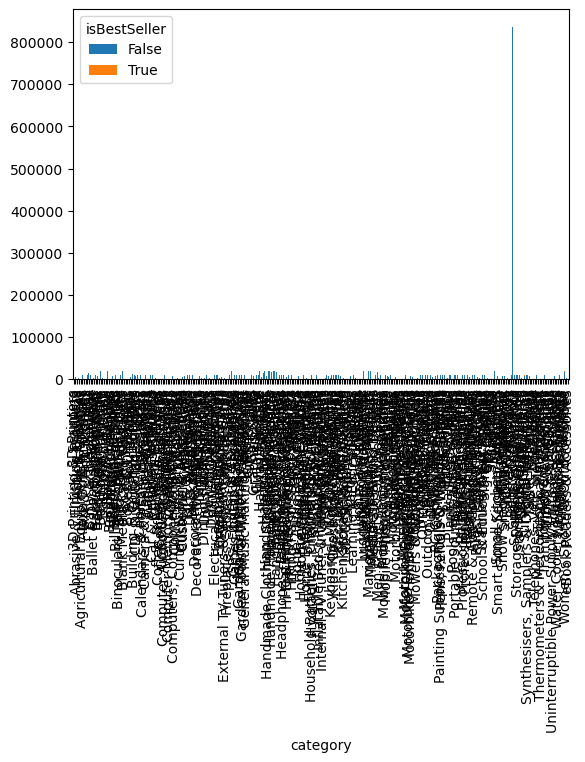

In [9]:
#1.3
crosstab.plot(kind='bar', stacked=True)

<Axes: xlabel='category'>

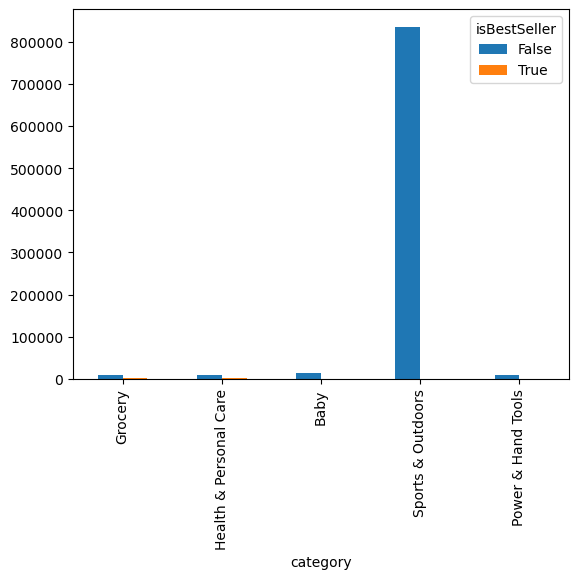

In [10]:
top_crosstab.plot(kind='bar', stacked=False)

In [12]:
#2.1
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bounds = Q1 - 1.5 * IQR
upper_bounds = Q3 + 1.5 * IQR

In [13]:
price_without_outliers = df[(df['price'] >= lower_bounds) & (df['price'] <= upper_bounds)]
price_without_outliers.head(2)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers


In [15]:
category_frequency = price_without_outliers['category'].value_counts()

top_category_frequency = category_frequency.head(20)

df_1 = price_without_outliers[price_without_outliers['category'].isin(top_category_frequency.index)]

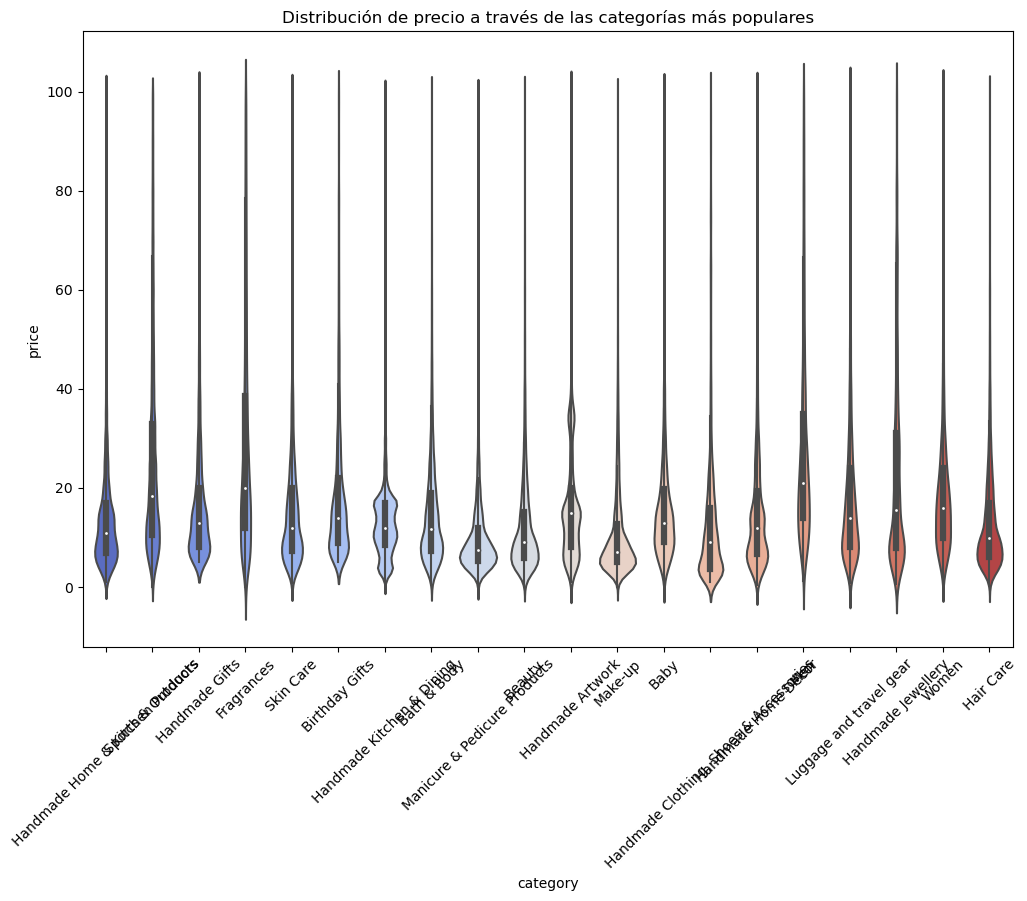

In [16]:
plt.figure(figsize=(12,8))
sns.violinplot(data=df_1, x='category', y='price', palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Distribución de precio a través de las categorías más populares')
plt.ylabel('price')
plt.xlabel('category')
plt.show()

In [17]:
precio_mediana = price_without_outliers.groupby('category').agg({'price':'median'})

precio_mediana_mas_alto_por_categoria = precio_mediana.idxmax()
precio_mediana_mas_alto_por_valor = precio_mediana.max()

precio_mediana_mas_alto_por_categoria, precio_mediana_mas_alto_por_valor

(price    Desktop PCs
 dtype: object,
 price    74.0
 dtype: float64)

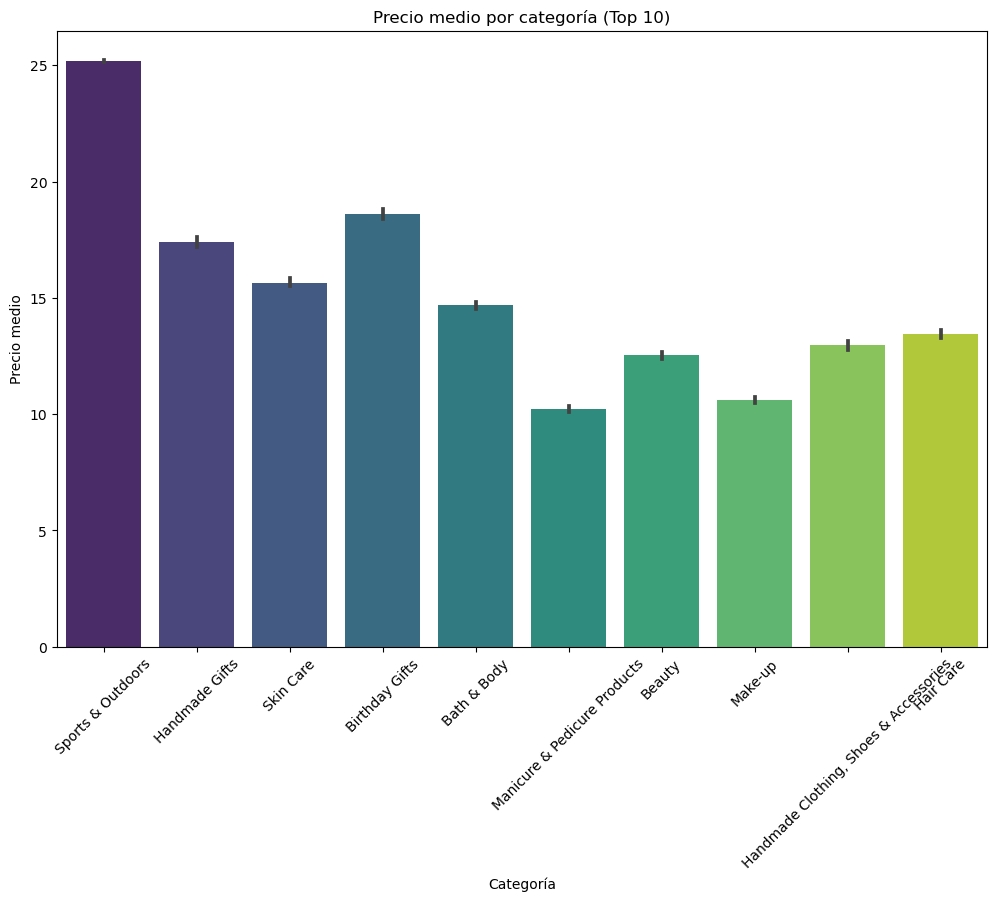

In [18]:
#2.2
top_category_frequency_2 = category_frequency.head(10)

df_2 = price_without_outliers[price_without_outliers['category'].isin(top_category_frequency_2.index)]

plt.figure(figsize=(12, 8))
sns.barplot(x='category', y='price', data=df_2, palette='viridis')
plt.xticks(rotation=45)  
plt.title('Precio medio por categoría (Top 10)')
plt.xlabel('Categoría')
plt.ylabel('Precio medio')
plt.show()

In [19]:
precio_medio = price_without_outliers.groupby('category').agg({'price':'mean'})

precio_medio_mas_alto_por_categoria = precio_medio.idxmax()
precio_medio_mas_alto_por_valor = precio_medio.max()

precio_medio_mas_alto_por_categoria, precio_medio_mas_alto_por_valor

(price    Motherboards
 dtype: object,
 price    68.772432
 dtype: float64)

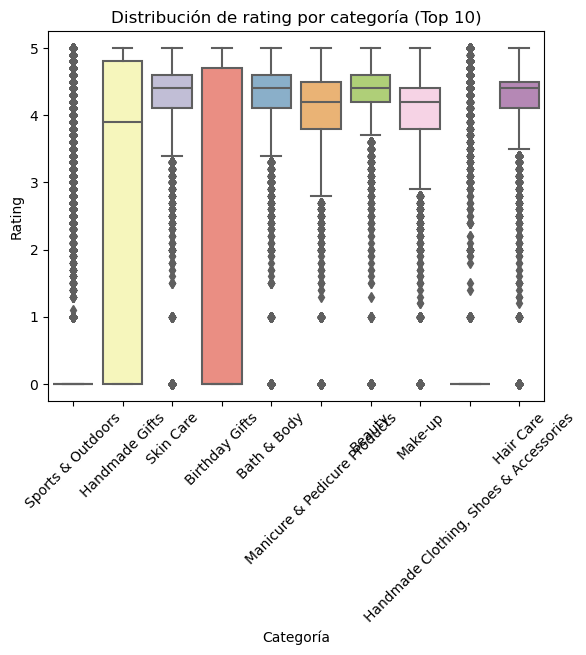

In [20]:
#2.3
sns.boxplot(x='category', y='stars', data=df_2, palette='Set3')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor visualización
plt.title('Distribución de rating por categoría (Top 10)')
plt.xlabel('Categoría')
plt.ylabel('Rating')
plt.show()

In [21]:
rating_mediana = price_without_outliers.groupby('category').agg({'stars':'median'})

rating_mediana_mas_alto_por_categoria = rating_mediana.idxmax()
rating_mediana_mas_alto_por_valor = rating_mediana.max()

rating_mediana_mas_alto_por_categoria, rating_mediana_mas_alto_por_valor

(stars    Computer Memory
 dtype: object,
 stars    4.7
 dtype: float64)

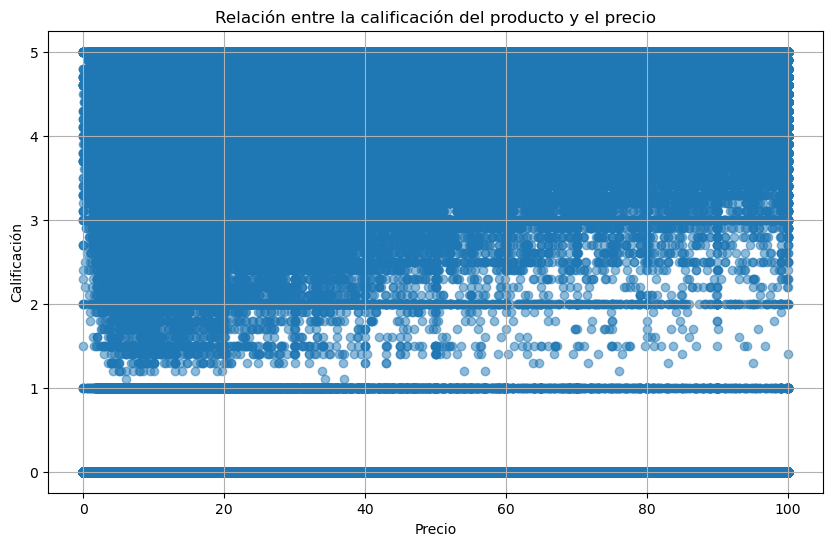

In [22]:
#3.1
correlation_coefficient = price_without_outliers['price'].corr(price_without_outliers['stars'])

correlation_coefficient_2 = price_without_outliers['price'].corr(price_without_outliers['stars'], method='spearman')

plt.figure(figsize=(10, 6))
plt.scatter(price_without_outliers['price'], price_without_outliers['stars'], alpha=0.5)
plt.title('Relación entre la calificación del producto y el precio')
plt.xlabel('Precio')
plt.ylabel('Calificación')
plt.grid(True)
plt.show()

In [24]:
numeric_columns = ['stars', 'reviews', 'price', 'boughtInLastMonth']
df_numeric = price_without_outliers[numeric_columns].apply(pd.to_numeric, errors='coerce')
correlation_matrix = df_numeric.corr()

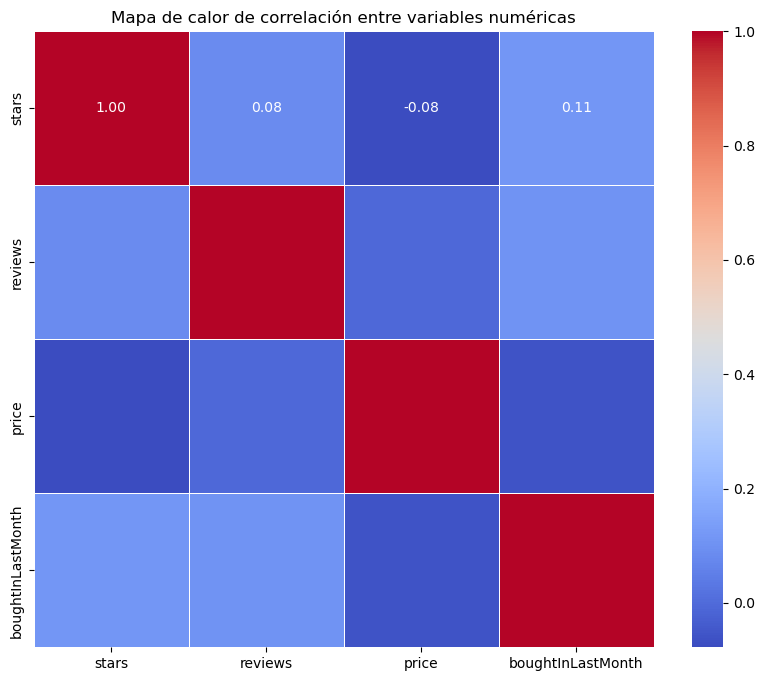

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de calor de correlación entre variables numéricas')
plt.show()

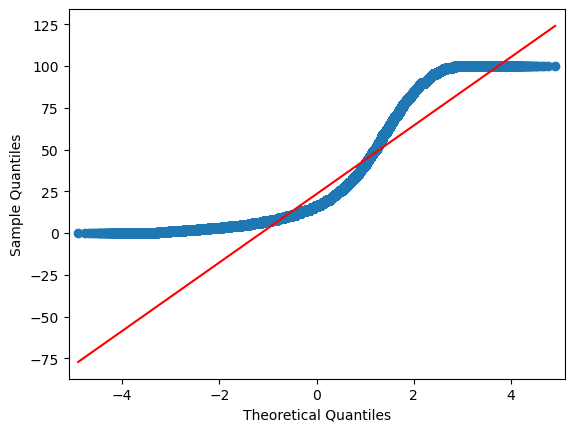

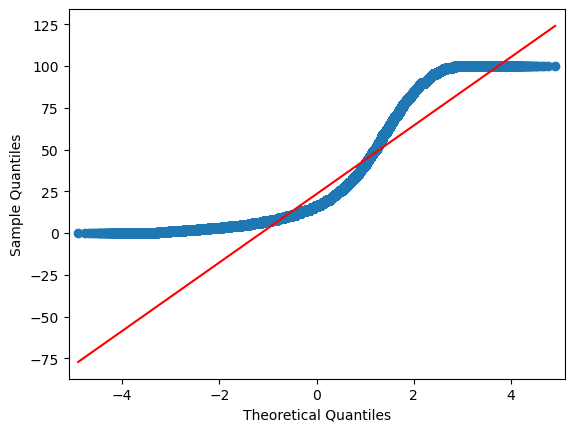

In [26]:
sm.qqplot(price_without_outliers['price'], line= 's')